In [1]:
# 경고무시
import warnings
warnings.filterwarnings(action='ignore', category=DeprecationWarning)

In [2]:
# load library
import pandas as pd 
import numpy as np
from sklearn.linear_model import ElasticNet # 엘라스틱넷
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.metrics import accuracy_score

In [3]:
# load data
감말랭이 = pd.read_csv("C:/ken/elasticnet/감말랭이_new.csv")
감말랭이.head()

,date,PC1,PC2,감말랭이
0,2018-01-01T00:00:00Z,-3.719474,0.965108,2.862813
1,2018-01-02T00:00:00Z,-3.741912,0.888377,4.328310
2,2018-01-03T00:00:00Z,-4.074829,0.748572,5.545913
3,2018-01-04T00:00:00Z,-4.325838,0.235772,5.867105
4,2018-01-05T00:00:00Z,-3.772842,0.246325,4.414783


In [4]:
# 날짜 컬럼 인덱스로 지정하기. 
감말랭이 = 감말랭이.set_index('date')
감말랭이 = 감말랭이.loc['2018-01-01' : '2019-12-32']

In [5]:
# 데이터셋의 target 변수 스케일링
from sklearn.preprocessing import MinMaxScaler
감말랭이['감말랭이_scaling'] = MinMaxScaler().fit_transform(감말랭이[['감말랭이']])

X = 감말랭이[['PC1','PC2']]
y = 감말랭이[['감말랭이']]

In [6]:
x_train, x_test, y_train, y_test = train_test_split(
                    X, y, test_size = 0.5, shuffle=False, random_state=2021) 
#test_size = 0.5로 하면 트레인, 테스트 반반으로 나뉘는 거니까

In [7]:
x_train.shape, x_test.shape

((365, 2), (365, 2))

In [8]:
alphas = [0.0001, 0.001, 0.01, 0.1, 0.3, 0.5, 0.7, 1]

for a in alphas:
    model = ElasticNet(alpha=a).fit(X, y)
    score = model.score(X, y)
    pred_y = model.predict(X)
    mse = mean_squared_error(y, pred_y)
    print("Alpha:{0:.4f}, R2:{1:.2f},MSE:{2:.2f}, RMSE:{3:.2f}".format(a, score, mse, np.sqrt(mse)))

Alpha:0.0001, R2:0.38,MSE:2.59, RMSE:1.61
Alpha:0.0010, R2:0.38,MSE:2.59, RMSE:1.61
Alpha:0.0100, R2:0.38,MSE:2.59, RMSE:1.61
Alpha:0.1000, R2:0.38,MSE:2.60, RMSE:1.61
Alpha:0.3000, R2:0.38,MSE:2.60, RMSE:1.61
Alpha:0.5000, R2:0.37,MSE:2.62, RMSE:1.62
Alpha:0.7000, R2:0.37,MSE:2.63, RMSE:1.62
Alpha:1.0000, R2:0.36,MSE:2.67, RMSE:1.63


R2(설명력) 높고 MSE와 RMSE 낮은 alpha = 0.0001, 0.001, 0.01, 0.1

In [9]:
# 애매하기 때문에 cross validation 돌려서 최적의 alpha 출력
from sklearn.linear_model import ElasticNetCV

elasticnet_cv=ElasticNetCV(alphas=alphas, cv=100)
model = elasticnet_cv.fit(x_train, y_train)
print(model.alpha_)

0.1


C:\Users\CPB06GameN\miniconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


alpha값이 0.1로 출력됐음 -> alpha가 0.1일 때, 테스트 세트에 대한 예측 확률이 좋았음

In [10]:
# calculate elasticnet R2, MSE, RMSE from test data
elasticnet=ElasticNet(alpha=0.1).fit(x_train, y_train)
ypred_elasticnet = elasticnet.predict(x_test)
score_elasticnet = elasticnet.score(x_test, y_test)
mse_elasticnet = mean_squared_error(y_test, ypred_elasticnet)
print("Final Result: Elasticnet R2:{0:.3f}, MSE:{1:.2f}, RMSE:{2:.2f}"
.format(score_elasticnet, mse_elasticnet, np.sqrt(mse_elasticnet)))

Final Result: Elasticnet R2:0.271, MSE:2.28, RMSE:1.51


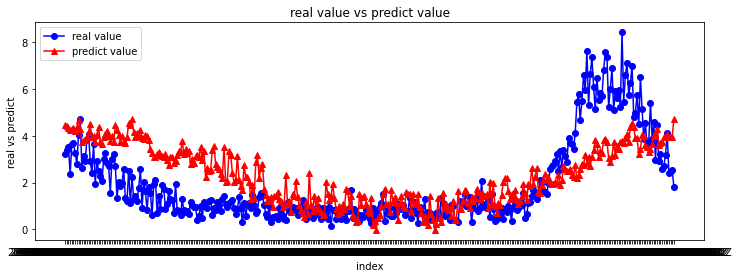

In [11]:
# y_true vs y_pred (시각화해서 비교)

fig = plt.figure( figsize = (12, 4) )
chart = fig.add_subplot(1,1,1)
chart.plot(y_test, marker='o', color='blue', label='real value')
chart.plot(ypred_elasticnet, marker='^', color='red', label='predict value')
chart.set_title('real value vs predict value')
plt.xlabel('index')
plt.ylabel('real vs predict')
plt.legend(loc = 'best') 